<a href="https://colab.research.google.com/github/saathisudip/EDA-and-Machine-Learning-on-Ecommerce-Customer-Device-Usage/blob/main/e_commerce_customers_device_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis: E-Commerce customers device usage**
****
**Background**
****
A New York City-based E-Commerce company specializes in online clothing sales and offers in-store style and clothing consultation sessions. Clients visit the physical store for personalized meetings with a stylist, and after the session, they can place orders for their desired clothing either through a mobile app or the website.

The company is currently evaluating whether to prioritize the enhancement of their mobile app experience or their website. This evaluation involves exploratory data analysis using the fictitious customer data.
****
**Objective**
****
The key objective of this project is to analyze customer datasets and summarize the main characteristics, often with the help of graphical representations and machine learning techniques.


****
**Importing libraries**
****

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

****
**Saving data from csv file into dataframe**
****

In [ ]:

customers = pd.read_csv('../content/Ecommerce Customers.csv')

****
**Let's look at the first five columns of the dataset**
****


In [ ]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


****
**Information about the columns and data types**
****

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


****
**Descriptive statistics**
****

In [ ]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


****
**Performing exploratory analysis by analyzing yearly amount vs time on website**
****

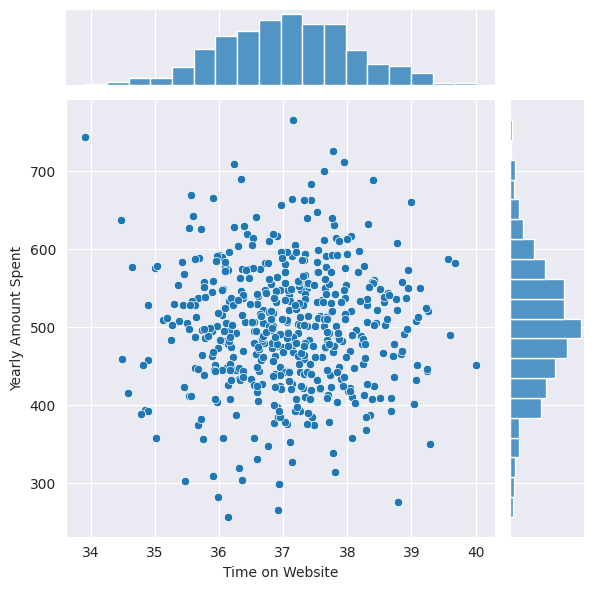

In [ ]:
sns.set_style('darkgrid')
sns.jointplot(x=customers['Time on Website'], y=customers['Yearly Amount Spent'], data=customers)

****
**Performing exploratory analysis by analyzing yearly amount spent vs time on app**
****

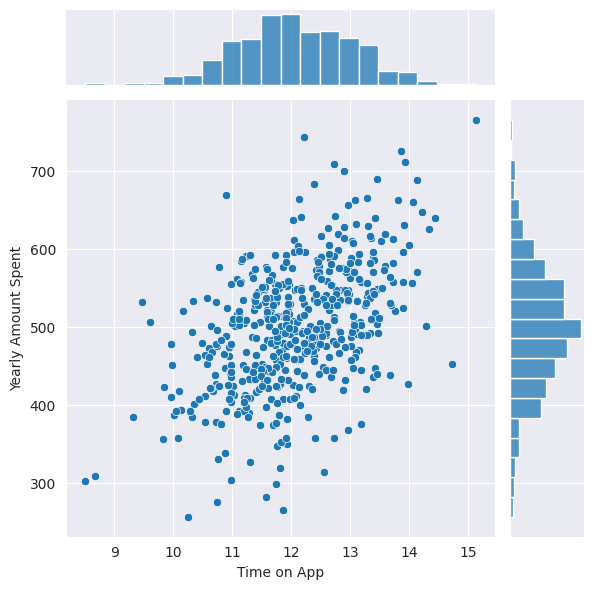

In [ ]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

****
**2D hex bin plot comparing Time on App and Length of Membership**
****

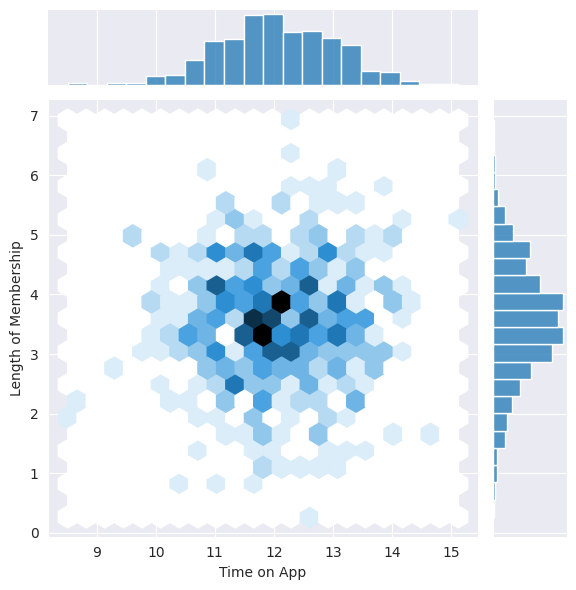

In [ ]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind='hex')

****
**Pair plot to explore relationships of variables across the entire data set**
****

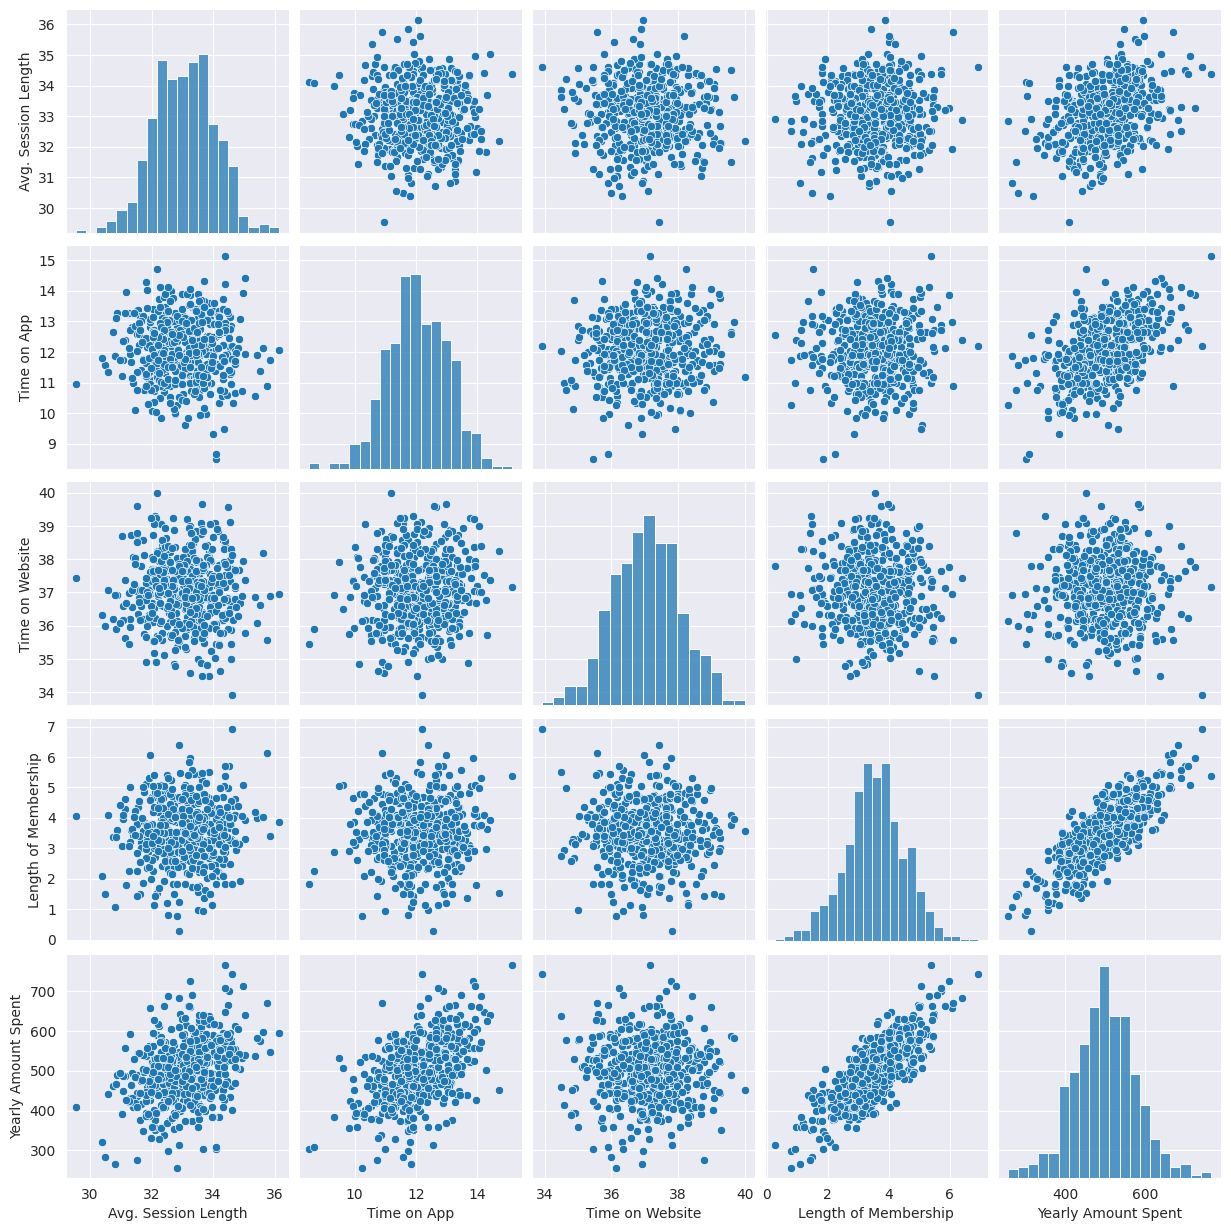

In [ ]:
sns.pairplot(customers)

Based on this pairplot, the Length of Membership seems to be most correlated with the Yearly Amount Spent.

## **Machile Learning: E-Commerce customers device usage**

****
**Create a linear regression model using seaborn to plot the relationship between Yearly Amount Spent vs Length of Membership**
****

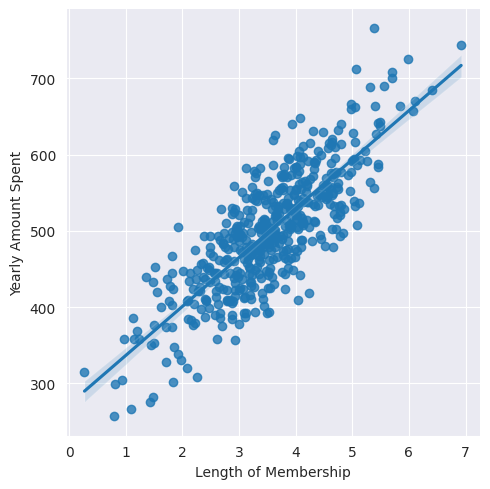

In [ ]:

sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

****
**Distribution of customer in yearly amount spent**
****

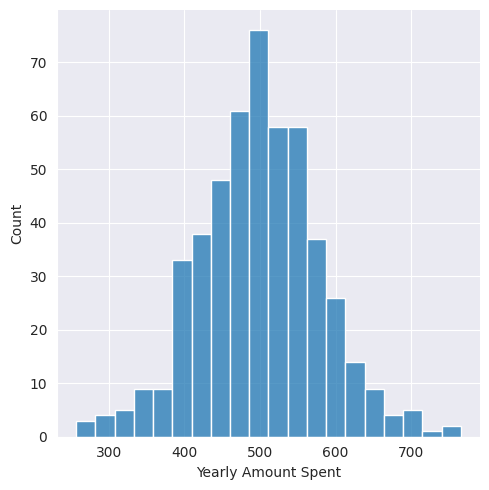

In [ ]:
sns.displot(customers['Yearly Amount Spent'])

****
**Display the correlation of all columns as a heatmap**
****

<ipython-input-20-4abaf86e2364>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(customers.corr(), annot=True)


<Axes: >

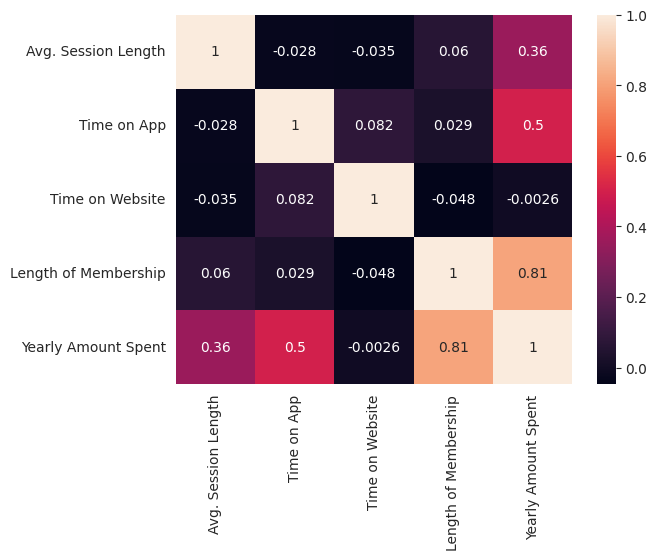

In [ ]:
sns.heatmap(customers.corr(), annot=True)

****
**Split the data into training and testing data**
****

In [ ]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


****
**Train the model**
****

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

****
**Printing the regression coefficients**
****

In [ ]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

****
**Predicting results from the test data**
****

Text(0.5, 0, 'y test')

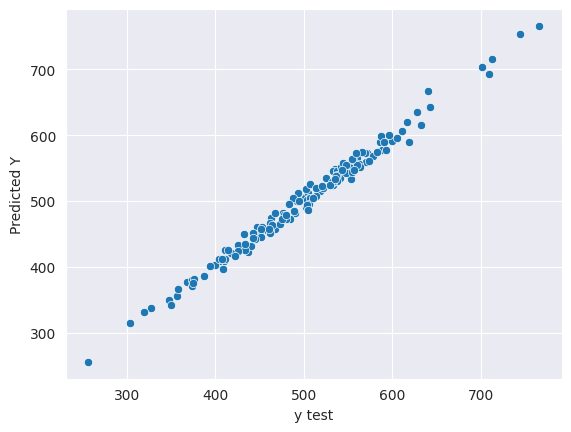

In [ ]:
predictions = lm.predict(X_test)
sns.scatterplot(y = predictions, x = y_test)
plt.ylabel('Predicted Y')
plt.xlabel('y test')

****
**Evaluating the performance of the model - Here are three common evaluation metrics for regression problems:**

* Mean Absolute Error (MAE) is the easiest to understand, because it's the average error.
* Mean Squared Error (MSE) is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
* Root Mean Squared Error (RMSE) is even more popular than MSE, because RMSE is interpretable in the "y" units.

**All of these are loss functions and we want to minimize them.**
****

In [ ]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predictions), ', Mean Squared Error: ',
      metrics.mean_squared_error(y_test, predictions) , ', Root Mean Squared Error: ',
      np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error:  7.228148653430826 , Mean Squared Error:  79.81305165097427 , Root Mean Squared Error:  8.933815066978624


****
**Variance score is very close to 1.**
****

In [ ]:
print('R^2: Variance Score is ', metrics.explained_variance_score(y_test, predictions))


R^2: Variance Score is  0.9890771231889606


****
**Ploting a histogram of the residuals and making sure it looks normally distributed**
****

<ipython-input-21-f73d90a72b95>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

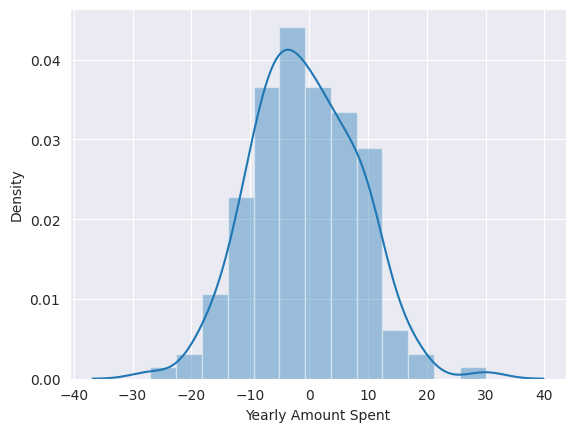

In [ ]:
sns.distplot(y_test-predictions)

****
**Analyzing the coefficients**

Interpreting the coefficients:

* Holding all other features fixed, a **1 unit** increase in **Avg. Session Length** is associated with an increase of **25.98** total dollars spent.
* Holding all other features fixed, a **1 unit** increase in **Time on App** is associated with an increase of **38.59** total dollars spent.
* Holding all other features fixed, a **1 unit** increase in **Time on Website** is associated with an increase of **0.19** total dollars spent.
* Holding all other features fixed, a **1 unit** increase in **Length of Membership** is associated with an increase of **61.27** total dollars spent.

In [ ]:
#Analyzing coefficients
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


****
**Conclusions**
****

Length of Membership appears to be most critical to the Yearly Amount Spent.
The app helps make 38.59 dollars and the website only 19 cents per unit time spent on it.
Depending on the cost associated with improving either, a decision may be made on where it is best to focus in order to improve Yearly Amount Spent of consumers.